In [52]:
import load_data as ld
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
% matplotlib inline

In [2]:
df = ld.load_data()

C:\Users\Kevin Rose\Applications\Anaconda2\lib\site-packages\IPython\core\interactiveshell.py:2881: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# Article Tags Exploration

In [3]:
print('Number relevant articles:', df['relevant'].sum())
print('Number tagged articles  :', df.loc[:, 'OEMC':'TASR'].any(1).sum())

Number relevant articles: 112091
Number tagged articles  : 36986


In [4]:
categories_df = ld.load_categories()
categories_df = categories_df.loc[:, ['abbreviation', 'category_name']]
categories_df.set_index('abbreviation', drop=True, inplace=True)

categories_df['counts'] = df.loc[:, 'OEMC':'TASR'].apply(sum, reduce=True)
categories_df

,category_name,counts
abbreviation,,
OEMC,Office of Emergency Management & Communications,127
CPD,Chicago Police Department,18362
SAO,Cook County State's Attorney's Office,3387
CCCC,Cook County Circuit Court,2546
CCJ,Cook County Jail,897
CCSP,Cook County Sheriff's Police,1450
CPUB,Cook County Public Defender's Office,222
IDOC,Illinois Department of Corrections,300
DOMV,Domestic Violence,1765


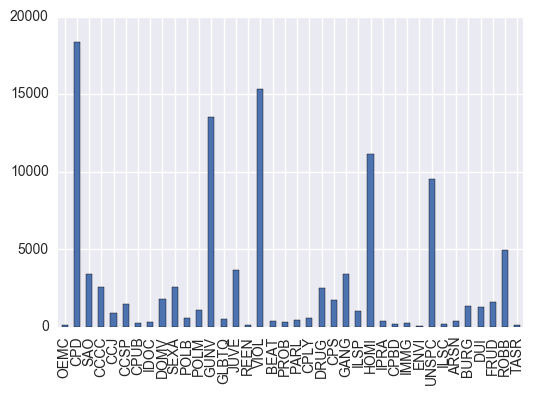

In [5]:
df.loc[:, 'OEMC':'TASR'].apply(sum, reduce=True).plot(kind='bar');

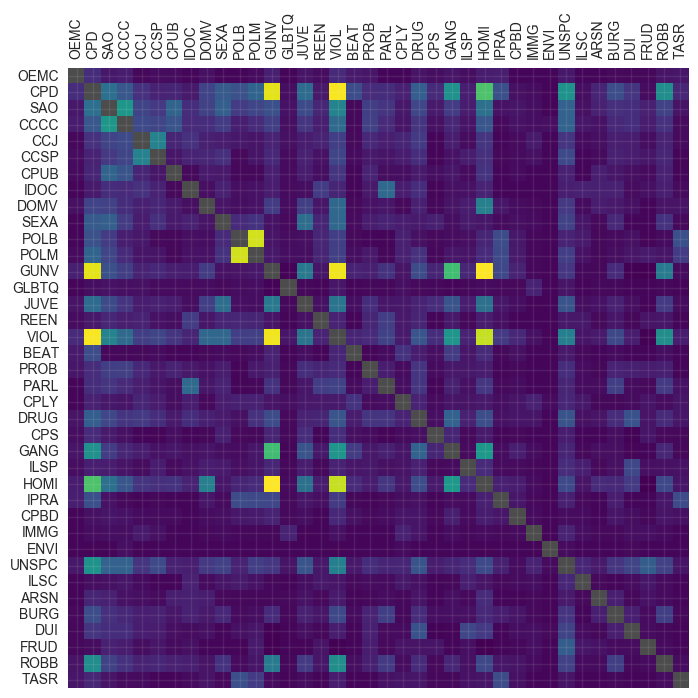

In [6]:
corrs = df.loc[:, 'OEMC':'TASR'].corr()
for i in range(corrs.shape[0]):
    corrs.iloc[i, i] = np.nan

cmap = matplotlib.cm.viridis
cmap.set_bad((.3, .3, .3),1.)

fig, ax = plt.subplots(figsize=(8, 8))
ax.matshow(np.ma.masked_invalid(corrs.values), cmap=cmap)

ax.grid(True, color=(.9, .9, .9), alpha=.1)

plt.xticks(range(len(corrs.columns)), corrs.columns, rotation=90);
plt.yticks(range(len(corrs.columns)), corrs.columns);

# Text Contents Exploration

In [7]:
# Print a random article just to see what they look like.
i = np.random.choice(df.shape[0])
print('ARTICLE ID:', df.index[i], '\n------------------')
print(df.iloc[i]['bodytext'])

ARTICLE ID: 236186 
------------------
By Tim Baffoe-

**(CBS)** When I watch a team lose both games of a home-and-home against the clo
wn shoes that are the New York Knicks, I can’t help but think, “Boy, do I want t
o see some of this in the postseason.”

I want off this broken third-world shuttle bus that is the 2015-'16 Chicago
Bulls.

Anger, disappointment, disgust, ennui -- I’ve wavered between them all in a
given week watching this team this season. Now it’s just fatigue. I’m tired of
the Bulls, and I don’t want to deal with their [high school pep rally fire
breathing][1] in a likely sweep of a playoff series.

"Hell yeah, I'm embarrassed," [forward Taj Gibson vented to ESPN.com on
Thursday night][2] after the loss in New York. "I take pride in wearing this
jersey. I love wearing the Bulls jersey. Especially what we've been through, I
take pride in playing for Chicago. When I wear that jersey, I try to go out
there and play my heart out. And it's frustrating when we come up short

## Some questions:

* How to handle articles that talk about more than one crime (i.e. a summary of weekend violence)?
* Would we want the scraper to keep any more information going forward? Author name, for example?
* Do we want to have manually-defined cleaning built around the format? I.e. specifically remove the links at the bottom that are result of RSS format? 

In [8]:
import nltk
# you may need to run nltk.download()
# and get the "punkt" dataset under the "Models" tab
# to use the word_tokenize function. Other models might
# be necessary as well.

In [30]:
def all_words():
    counter = 0
    for txt in df['bodytext']:
        tokens = nltk.tokenize.word_tokenize(txt)
        for t in tokens:
            if t[0] not in '[](){},.\'"`*:;/\\-+=_':
                yield t.lower()
                counter += 1
            if counter > 5e6: # at some point will need to run fully, but truncate for now
                return

In [31]:
word_freqs = nltk.FreqDist(all_words())

"the": 231437
"to": 116701
"a": 112429
"and": 108191
"of": 97070
"in": 87230
"that": 44196
"for": 41221
"was": 40798
"said": 39098
"on": 35101
"he": 33583
"is": 30756
"with": 28984
"http": 27320
"at": 27077
"it": 25655
"his": 23825
"1": 23028
"2": 22471
"as": 20701
"by": 20654
"i": 20545
"3": 19684
"be": 18580
"from": 18571
"#": 18509
"4": 18202
"this": 18195
"not": 17076
"5": 16959
"have": 16805
"but": 16358
"an": 15952
"chicago": 15871
"police": 15635
"6": 15384
"they": 15253
"who": 15136
"are": 15050


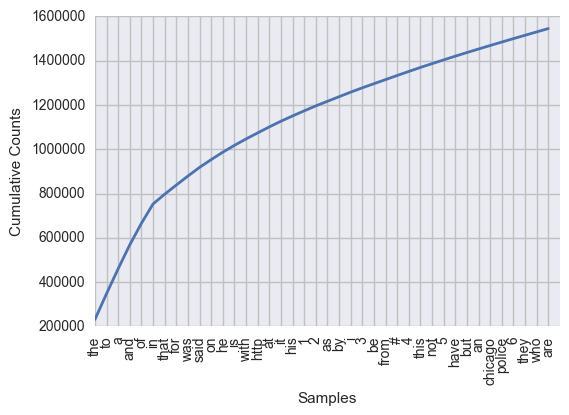

In [33]:
for pair in word_freqs.most_common(40):
    print('"{}": {}'.format(pair[0], pair[1]))
word_freqs.plot(40, cumulative=True)

In [43]:
print('The word "the" is {0:.4} times more common than "gun".'.format(
    word_freqs.freq('the') / word_freqs.freq('gun')
))

The word "the" is 173.5 times more common than "gun".


In [54]:
print('Confusion matrix using existence of "gun" to predict "GUNV" tag:')
pd.crosstab(df['bodytext'].str.contains('gun'), df['GUNV'])

Confusion matrix using existence of "gun" to predict "GUNV" tag:


GUNV,0,1
bodytext,,
False,238193,4347
True,20121,9147
